<a href="https://colab.research.google.com/github/Bhavika2210/LGM-Data_Science/blob/main/Terrorism_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis on GLOBAL TERRORISM dataset\
Task: To find out the hot zones of terrorism \
Bhavika Sachdeva\
Data Science Intern


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/LGM-Internship/globalterrorism.csv",encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
data.shape

(181691, 135)

In [ ]:
data.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000000,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000000,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197000000000,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.tail(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181688,202000000000,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,202000000000,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,202000000000,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
data.rename(columns={'imonth':'Month','iday':'Day','region_txt':'Region','country_txt':'Country','provstate':'state',
                       'iyear':'Year','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Many unwanted columns are present in this dataset


In [ ]:
data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
data.shape

(181691, 18)

In [ ]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [ ]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
data['Country'].value_counts()

Iraq                 24636
Pakistan             14368
Afghanistan          12731
India                11960
Colombia              8306
                     ...  
St. Lucia                1
South Vietnam            1
Vatican City             1
Andorra                  1
Wallis and Futuna        1
Name: Country, Length: 205, dtype: int64

In [ ]:
print('Country with the maximum number of Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with the maximum number of  Terrorist Attacks:',data['Region'].value_counts().index[0])
print('The maximum number of people that were killed by a single terrorist attack is',data['Killed'].max(),'people that took place in',data.loc[data['Killed'].idxmax()].Country)

Country with the maximum number of Terrorist Attacks: Iraq
Regions with the maximum number of  Terrorist Attacks: Middle East & North Africa
The maximum number of people that were killed by a single terrorist attack is 1570.0 people that took place in Iraq



idxmax() function returns index of first occurrence of maximum over requested axis.

The value_counts() function is used to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element

In [ ]:
np.unique(data['AttackType'])

array(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown'],
      dtype=object)

In [ ]:
print(" Maximum number of people wounded were :",data['Wounded'].max(),"in",data.loc[data['Killed'].idxmax()].Country,"on",data.loc[data['Killed'].idxmax()].Day,data.loc[data['Killed'].idxmax()].Month,data.loc[data['Killed'].idxmax()].Year)

 Maximum number of people wounded were : 8191.0 in Iraq on 12 6 2014


In [ ]:
data['Group'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Colombian Revolution                                    1
Pareci Indians                                          1
First Capital Command (PCC)                             1
SFT                                                     1
Comando Bautista B                                      1
Name: Group, Length: 3537, dtype: int64

In [ ]:
data[data['Wounded'] >=700].sort_values('Killed')['Country'].head(10)

23314     United States
54147        Tajikistan
159773             Iraq
58841             Japan
179344    United States
17132              Iran
61548         Sri Lanka
85682              Chad
81098             India
68071             Kenya
Name: Country, dtype: object

In [ ]:
data.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


More the kills, more will be the number of people wounded



In [ ]:
pd.crosstab(index=data['Weapon_type'],columns=data['AttackType'],dropna=True, normalize=True)


AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Weapon_type,,,,,,,,,
Biological,0.000000,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000,0.000187,0.000000
Chemical,0.000011,0.000088,0.000358,0.000176,0.000000,0.000011,0.000022,0.001101,0.000000
Explosives,0.010909,0.017700,0.477685,0.000033,0.000391,0.000743,0.001227,0.000011,0.000000
Fake Weapons,0.000000,0.000000,0.000028,0.000011,0.000105,0.000000,0.000017,0.000017,0.000006
Firearms,0.202415,0.074929,0.004161,0.006258,0.001899,0.003478,0.028928,0.000000,0.000039
Incendiary,0.012340,0.000754,0.001167,0.045759,0.000121,0.000215,0.000732,0.000198,0.000000
Melee,0.008311,0.004321,0.000033,0.000638,0.000182,0.000149,0.003242,0.003236,0.000006
Other,0.000017,0.000022,0.000017,0.000116,0.000000,0.000006,0.000187,0.000264,0.000000
Radiological,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000,0.000000,0.000072,0.000000


We observe that Explosives were widely used to carry out Bombing and Firearms for Armed Assault 

In [ ]:
data['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

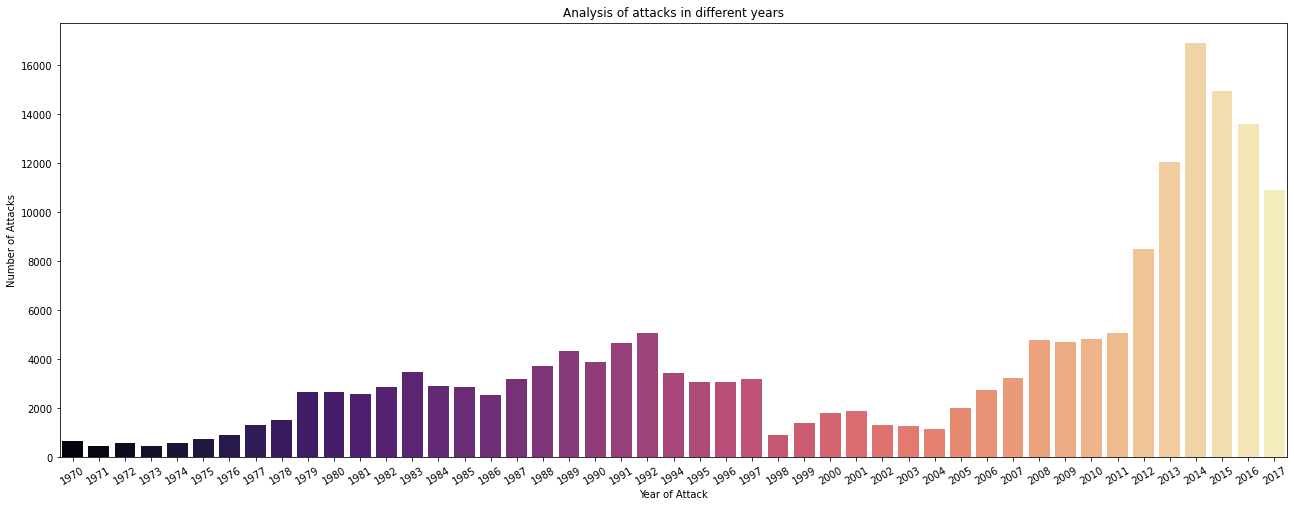

In [ ]:
x_Year = data['Year'].unique()
y_count_years = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (22,8))
sns.barplot(x = x_Year,y = y_count_years,palette = 'magma')
plt.xticks(rotation = 30)   #to prevent overlapping of the years
plt.xlabel('Year of Attack')
plt.ylabel('Number of Attacks')
plt.title('Analysis of attacks in different years')
plt.show()

In [ ]:
np.unique(data.Group).shape

(3537,)

Plotting a crosstab: 

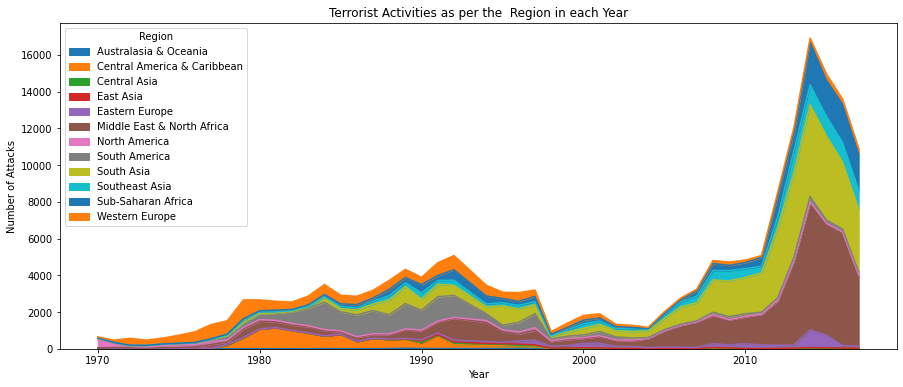

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities as per the  Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
data['Wounded'] = data['Wounded'].fillna(0).astype(int)    # filling all the NAN values with 0 and changing the data type to integer
data['Killed'] = data['Killed'].fillna(0).astype(int)
data['Casualities'] = data['Killed'] + data['Wounded']

In [ ]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive',
       'Casualities'],
      dtype='object')

In [ ]:
data1 = data.sort_values(by='Casualities',ascending=False)[:50]

In [ ]:
heat=data1.pivot_table(index='Country',columns='Year',values='Casualities')    # Used to create a spreadsheet-style table as a DataFrame. 
heat.fillna(0,inplace=True)                                                    #The levels in the pivot table will be stored in MultiIndex objects 

In [ ]:
heat.head()

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
heat.tail()

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sri Lanka,0.0,0.0,0.0,0.0,0.0,0.0,907.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Syria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,517.0,0.0,433.0,0.0
Tajikistan,0.0,0.0,0.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
United States,0.0,751.0,0.0,0.0,0.0,818.0,0.0,0.0,0.0,9574.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,910.0


In [ ]:
data.Country.value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

In [ ]:
import folium
from folium.plugins import MarkerCluster 
filterYear = data['Year'] == 2001

In [ ]:
filterData = data[filterYear] 
filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # dropping NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 71650 to 73555
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1906 non-null   int64  
 1   Month        1906 non-null   int64  
 2   Day          1906 non-null   int64  
 3   Country      1906 non-null   object 
 4   state        1904 non-null   object 
 5   Region       1906 non-null   object 
 6   city         1906 non-null   object 
 7   latitude     1883 non-null   float64
 8   longitude    1883 non-null   float64
 9   AttackType   1906 non-null   object 
 10  Killed       1906 non-null   int64  
 11  Wounded      1906 non-null   int64  
 12  Target       1906 non-null   object 
 13  Summary      1906 non-null   object 
 14  Group        1906 non-null   object 
 15  Target_type  1906 non-null   object 
 16  Weapon_type  1906 non-null   object 
 17  Motive       1902 non-null   object 
 18  Casualities  1906 non-null   int64  
dtypes

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=10)    # Latitude and Longitude of Map (Northing, Easting)  Initial zoom level for the map.
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [ ]:
data.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



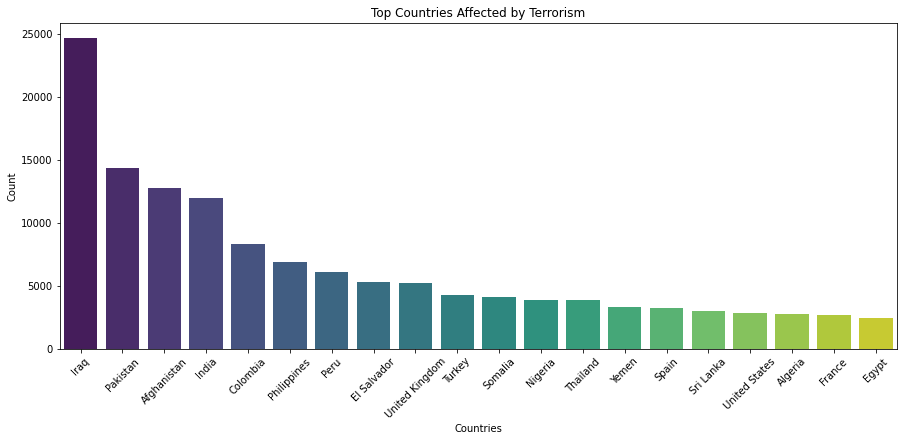

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:20].index,data['Country'].value_counts()[:20].values,palette='viridis')
plt.title('Top Countries Affected by Terrorism')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

Iraq, Pakistan and Afghanistan have had the most severe damage due to terrorism